In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [228]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [289]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [230]:
df.shape


(26707, 34)

In [231]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [232]:
lowlotfrontage,upplotfrontage=remove_outlier(df['bought_face_mask'])
df["bought_face_mask"]=np.where(df['bought_face_mask']>upplotfrontage,upplotfrontage,df['bought_face_mask'])
df["bought_face_mask"]=np.where(df['bought_face_mask']<lowlotfrontage,lowlotfrontage,df['bought_face_mask'])

In [233]:
lowlotfrontage,upplotfrontage=remove_outlier(df['wash_hands_frequently'])
df["wash_hands_frequently"]=np.where(df['wash_hands_frequently']>upplotfrontage,upplotfrontage,df['wash_hands_frequently'])
df["wash_hands_frequently"]=np.where(df['wash_hands_frequently']<lowlotfrontage,lowlotfrontage,df['wash_hands_frequently'])

In [234]:
lowlotfrontage,upplotfrontage=remove_outlier(df['avoid_large_gatherings'])
df["avoid_large_gatherings"]=np.where(df['avoid_large_gatherings']>upplotfrontage,upplotfrontage,df['avoid_large_gatherings'])
df["avoid_large_gatherings"]=np.where(df['avoid_large_gatherings']<lowlotfrontage,lowlotfrontage,df['avoid_large_gatherings'])

In [235]:
lowlotfrontage,upplotfrontage=remove_outlier(df['dr_recc_h1n1_vacc'])
df["dr_recc_h1n1_vacc"]=np.where(df['dr_recc_h1n1_vacc']>upplotfrontage,upplotfrontage,df['dr_recc_h1n1_vacc'])
df["dr_recc_h1n1_vacc"]=np.where(df['dr_recc_h1n1_vacc']<lowlotfrontage,lowlotfrontage,df['dr_recc_h1n1_vacc'])

In [236]:
lowlotfrontage,upplotfrontage=remove_outlier(df['cont_child_undr_6_mnths'])
df["cont_child_undr_6_mnths"]=np.where(df['cont_child_undr_6_mnths']>upplotfrontage,upplotfrontage,df['cont_child_undr_6_mnths'])
df["cont_child_undr_6_mnths"]=np.where(df['cont_child_undr_6_mnths']<lowlotfrontage,lowlotfrontage,df['cont_child_undr_6_mnths'])

In [237]:
lowlotfrontage,upplotfrontage=remove_outlier(df['is_health_worker'])
df["is_health_worker"]=np.where(df['is_health_worker']>upplotfrontage,upplotfrontage,df['is_health_worker'])
df["is_health_worker"]=np.where(df['is_health_worker']<lowlotfrontage,lowlotfrontage,df['is_health_worker'])

In [238]:
lowlotfrontage,upplotfrontage=remove_outlier(df['has_health_insur'])
df["has_health_insur"]=np.where(df['has_health_insur']>upplotfrontage,upplotfrontage,df['has_health_insur'])
df["has_health_insur"]=np.where(df['has_health_insur']<lowlotfrontage,lowlotfrontage,df['has_health_insur'])

In [239]:
lowlotfrontage,upplotfrontage=remove_outlier(df['no_of_children'])
df["no_of_children"]=np.where(df['no_of_children']>upplotfrontage,upplotfrontage,df['no_of_children'])
df["no_of_children"]=np.where(df['no_of_children']<lowlotfrontage,lowlotfrontage,df['no_of_children'])

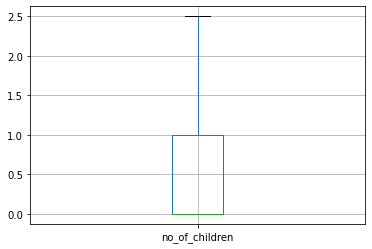

In [240]:
df.boxplot(column=["no_of_children"])
plt.show()

In [241]:
lowlotfrontage,upplotfrontage=remove_outlier(df['is_seas_vacc_effective'])
df["is_seas_vacc_effective"]=np.where(df['is_seas_vacc_effective']>upplotfrontage,upplotfrontage,df['is_seas_vacc_effective'])
df["is_seas_vacc_effective"]=np.where(df['is_seas_vacc_effective']<lowlotfrontage,lowlotfrontage,df['is_seas_vacc_effective'])

In [242]:
lowlotfrontage,upplotfrontage=remove_outlier(df['no_of_adults'])
df["no_of_adults"]=np.where(df['no_of_adults']>upplotfrontage,upplotfrontage,df['no_of_adults'])
df["no_of_adults"]=np.where(df['no_of_adults']<lowlotfrontage,lowlotfrontage,df['no_of_adults'])

In [243]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [244]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [245]:
df["h1n1_worry"]=df["h1n1_worry"].replace(to_replace="0",value=np.nan)
df["h1n1_worry"]=df["h1n1_worry"].astype(float)
mean=df["h1n1_worry"].mean()
mean
df["h1n1_worry"].replace(np.nan,mean,inplace=True)

In [246]:
df["h1n1_awareness"]=df["h1n1_awareness"].replace(to_replace="0",value=np.nan)
df["h1n1_awareness"]=df["h1n1_awareness"].astype(float)
mean=df["h1n1_awareness"].mean()
mean
df["h1n1_awareness"].replace(np.nan,mean,inplace=True)

In [247]:
df["antiviral_medication"]=df["antiviral_medication"].replace(to_replace="0",value=np.nan)
df["antiviral_medication"]=df["antiviral_medication"].astype(float)
mean=df["antiviral_medication"].mean()
mean
df["antiviral_medication"].replace(np.nan,mean,inplace=True)

In [248]:
df["contact_avoidance"]=df["contact_avoidance"].replace(to_replace="0",value=np.nan)
df["contact_avoidance"]=df["contact_avoidance"].astype(float)
mean=df["contact_avoidance"].mean()
mean
df["contact_avoidance"].replace(np.nan,mean,inplace=True)

In [249]:
df["bought_face_mask"]=df["bought_face_mask"].replace(to_replace="0",value=np.nan)
df["bought_face_mask"]=df["bought_face_mask"].astype(float)
mean=df["bought_face_mask"].mean()
mean
df["bought_face_mask"].replace(np.nan,mean,inplace=True)

In [250]:
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(to_replace="0",value=np.nan)
df["wash_hands_frequently"]=df["wash_hands_frequently"].astype(float)
mean=df["wash_hands_frequently"].mean()
mean
df["wash_hands_frequently"].replace(np.nan,mean,inplace=True)

In [251]:
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(to_replace="0",value=np.nan)
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].astype(float)
mean=df["avoid_large_gatherings"].mean()
mean
df["avoid_large_gatherings"].replace(np.nan,mean,inplace=True)

In [252]:
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].replace(to_replace="0",value=np.nan)
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].astype(float)
mean=df["reduced_outside_home_cont"].mean()
mean
df["reduced_outside_home_cont"].replace(np.nan,mean,inplace=True)

In [253]:
df["avoid_touch_face"]=df["avoid_touch_face"].replace(to_replace="0",value=np.nan)
df["avoid_touch_face"]=df["avoid_touch_face"].astype(float)
mean=df["avoid_touch_face"].mean()
mean
df["avoid_touch_face"].replace(np.nan,mean,inplace=True)

In [254]:
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(to_replace="0",value=np.nan)
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].astype(float)
mean=df["dr_recc_h1n1_vacc"].mean()
mean
df["dr_recc_h1n1_vacc"].replace(np.nan,mean,inplace=True)

In [255]:
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].replace(to_replace="0",value=np.nan)
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].astype(float)
mean=df["dr_recc_seasonal_vacc"].mean()
mean
df["dr_recc_seasonal_vacc"].replace(np.nan,mean,inplace=True)

In [256]:
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(to_replace="0",value=np.nan)
df["chronic_medic_condition"]=df["chronic_medic_condition"].astype(float)
mean=df["chronic_medic_condition"].mean()
mean
df["chronic_medic_condition"].replace(np.nan,mean,inplace=True)

In [257]:
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].replace(to_replace="0",value=np.nan)
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].astype(float)
mean=df["cont_child_undr_6_mnths"].mean()
mean
df["cont_child_undr_6_mnths"].replace(np.nan,mean,inplace=True)

In [258]:
df["is_health_worker"]=df["is_health_worker"].replace(to_replace="0",value=np.nan)
df["is_health_worker"]=df["is_health_worker"].astype(float)
mean=df["is_health_worker"].mean()
mean
df["is_health_worker"].replace(np.nan,mean,inplace=True)

In [259]:
df["has_health_insur"]=df["has_health_insur"].replace(to_replace="0",value=np.nan)
df["has_health_insur"]=df["has_health_insur"].astype(float)
mean=df["has_health_insur"].mean()
mean
df["has_health_insur"].replace(np.nan,mean,inplace=True)

In [260]:
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(to_replace="0",value=np.nan)
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].astype(float)
mean=df["is_h1n1_vacc_effective"].mean()
mean
df["is_h1n1_vacc_effective"].replace(np.nan,mean,inplace=True)

In [261]:
df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(to_replace="0",value=np.nan)
df["is_h1n1_risky"]=df["is_h1n1_risky"].astype(float)
mean=df["is_h1n1_risky"].mean()
mean
df["is_h1n1_risky"].replace(np.nan,mean,inplace=True)

In [262]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(to_replace="0",value=np.nan)
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].astype(float)
mean=df["sick_from_h1n1_vacc"].mean()
mean
df["sick_from_h1n1_vacc"].replace(np.nan,mean,inplace=True)

In [263]:
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(to_replace="0",value=np.nan)
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].astype(float)
mean=df["is_seas_vacc_effective"].mean()
mean
df["is_seas_vacc_effective"].replace(np.nan,mean,inplace=True)

In [264]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(to_replace="0",value=np.nan)
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].astype(float)
mean=df["sick_from_h1n1_vacc"].mean()
mean
df["sick_from_h1n1_vacc"].replace(np.nan,mean,inplace=True)

In [265]:
df["is_seas_risky"]=df["is_seas_risky"].replace(to_replace="0",value=np.nan)
df["is_seas_risky"]=df["is_seas_risky"].astype(float)
mean=df["is_seas_risky"].mean()
mean
df["is_seas_risky"].replace(np.nan,mean,inplace=True)

In [266]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(to_replace="0",value=np.nan)
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].astype(float)
mean=df["sick_from_h1n1_vacc"].mean()
mean
df["sick_from_h1n1_vacc"].replace(np.nan,mean,inplace=True)

In [267]:
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(to_replace="0",value=np.nan)
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].astype(float)
mean=df["sick_from_seas_vacc"].mean()
mean
df["sick_from_seas_vacc"].replace(np.nan,mean,inplace=True)

In [268]:
df["no_of_adults"]=df["no_of_adults"].replace(to_replace="0",value=np.nan)
df["no_of_adults"]=df["no_of_adults"].astype(float)
mean=df["no_of_adults"].mean()
mean
df["no_of_adults"].replace(np.nan,mean,inplace=True)

In [269]:
df["no_of_children"]=df["no_of_children"].replace(to_replace="0",value=np.nan)
df["no_of_children"]=df["no_of_children"].astype(float)
mean=df["no_of_children"].mean()
mean
df["no_of_children"].replace(np.nan,mean,inplace=True)

In [270]:
mode=df['qualification'].mode().values[0]
df['qualification']=df['qualification'].replace(np.nan,mode)


In [271]:
mode=df['income_level'].mode().values[0]
df['income_level']=df['income_level'].replace(np.nan,mode)


In [272]:
mode=df['marital_status'].mode().values[0]
df['marital_status']=df['marital_status'].replace(np.nan,mode)


In [273]:
mode=df['housing_status'].mode().values[0]
df['housing_status']=df['housing_status'].replace(np.nan,mode)


In [274]:
mode=df['employment'].mode().values[0]
df['employment']=df['employment'].replace(np.nan,mode)


In [275]:
df.drop_duplicates(inplace=True)
dpl=df.duplicated()
dpl.sum()

0

In [276]:
df.dtypes


unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [277]:
dummies=pd.get_dummies(df[['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']])
df=pd.concat([df,dummies],axis=1)

In [278]:
columns=['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']
df.drop(columns,axis=1,inplace=True)

In [279]:
df.shape


(26707, 53)

In [280]:
df.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_12 Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_level_<= $75,000, Above Poverty","income_level_> $75,000",income_level_Below Poverty,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
unique_id,1.000000,0.017804,0.003418,-0.008463,0.009602,NaN,NaN,0.004532,0.008995,0.007555,NaN,0.001438,0.005692,NaN,NaN,NaN,0.005867,0.000951,-0.002254,0.003286,-0.005240,0.009465,0.000596,-0.003803,-0.003280,-0.010034,-0.003987,0.003766,0.003790,0.005368,-0.002043,0.012543,-0.008513,0.003395,0.003819,-0.004107,0.004453,-0.002661,-0.005169,0.005169,0.006433,-0.007414,0.000503,0.003021,-0.003021,0.007372,-0.007372,0.002011,0.002272,-0.009269,-0.004773,0.002355,0.002916
h1n1_worry,0.017804,1.000000,0.062081,0.089985,0.231965,NaN,NaN,0.254137,0.245597,0.246809,NaN,0.129469,0.092824,NaN,NaN,NaN,0.236856,0.372900,0.355981,0.225978,0.329235,0.222350,-0.014506,0.052007,0.121747,-0.088554,0.022150,0.025082,0.025760,0.015817,0.031224,0.054420,-0.037352,-0.022309,0.100866,0.063339,0.028712,-0.123243,0.127402,-0.127402,-0.021034,-0.026131,0.071225,0.028324,-0.028324,-0.000503,0.000503,-0.052918,0.039829,0.030373,-0.000946,-0.005306,0.006507
h1n1_awareness,0.003418,0.062081,1.000000,-0.010802,0.088151,NaN,NaN,-0.048697,-0.067895,0.085646,NaN,0.068533,-0.021939,NaN,NaN,NaN,0.119338,0.072101,-0.019217,0.085561,0.075499,-0.061298,0.030337,0.053811,0.117714,-0.045750,0.048991,0.075374,0.062131,-0.124220,-0.136040,-0.209175,0.214794,0.020704,-0.118774,-0.070718,-0.031622,0.141463,0.067175,-0.067175,-0.075322,0.193027,-0.159529,0.108665,-0.108665,0.108308,-0.108308,0.119751,-0.099493,-0.048667,0.049327,0.002180,-0.057368
antiviral_medication,-0.008463,0.089985,-0.010802,1.000000,0.049075,NaN,NaN,0.106089,0.127339,0.070740,NaN,0.029831,0.008199,NaN,NaN,NaN,0.029812,0.103551,0.077857,0.020270,0.083740,0.082609,0.043349,0.083905,0.040518,0.068354,0.041802,-0.000198,-0.037814,-0.060340,0.013853,0.054558,-0.036523,-0.007079,0.044961,0.123959,0.019540,-0.117624,0.006177,-0.006177,-0.029688,-0.028790,0.088822,-0.006040,0.006040,-0.056706,0.056706,0.009358,-0.020312,0.023068,-0.019807,0.020978,0.000587
contact_avoidance,0.009602,0.231965,0.088151,0.049075,1.000000,NaN,NaN,0.226534,0.219346,0.332878,NaN,0.070698,0.038434,NaN,NaN,NaN,0.110858,0.116473,0.129794,0.114326,0.127525,0.081612,0.021940,0.042651,0.047538,-0.024633,0.012254,0.022126,0.017913,-0.024277,-0.007560,-0.010252,-0.001124,0.014944,-0.001211,0.002501,-0.008032,0.004011,0.113486,-0.113486,-0.028863,0.036875,-0.007476,0.045365,-0.045365,0.028998,-0.028998,-0.019999,0.013642,0.014500,0.033854,-0.015100,-0.022324
bought_face_mask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wash_hands_frequently,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avoid_large_gatherings,0.004532,0.

In [281]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [282]:
df.head(50)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_12 Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_level_<= $75,000, Above Poverty","income_level_> $75,000",income_level_Below Poverty,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.000000,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.5,1.0,2.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1
1,1,3.000000,2.0,0.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0
2,2,1.000000,1.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.329735,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0
3,3,1.000000,1.0,0.0,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
4,4,2.000000,1.0,0.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0
5,5,3.000000,1.0,0.0,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.0,5.0,2.0,1.0,5.0,4.0,4.0,2.0,2.5,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0
6,6,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0
7,7,1.000000,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
8,8,0.000000,2.0,0.0,1.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
9,9,2.000000,1.0,0.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0


In [283]:
x=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [285]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\Vasanth\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Vasanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [286]:
reg.score(x_train,y_train)

0.8064084733069434

In [287]:
reg.score(x_test,y_test)

0.810058654686135

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [3]:
NNH=KNeighborsClassifier(n_neighbors=10, weights='distance',metric='manhattan')